In [4]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Path to the src directory
src_path = '/cluster/home/taheeraa/code/master-thesis/01-multi-label/src'

if src_path not in sys.path:
    sys.path.append(src_path)


In [6]:
data_path = "/cluster/home/taheeraa/datasets/chestxray-14"
labels = [
    "Atelectasis", 
    "Cardiomegaly",
    "Effusion", 
    "Infiltration", 
    "Mass",
    "Nodule",
    "Pneumonia",
    "Pneumothorax",  
    "Consolidation",
    "Edema",
    "Emphysema",
    "Fibrosis",
    "Pleural_Thickening",
    "Hernia"
]
file_path_train = data_path + '/train_official.txt'
file_path_val = data_path + '/val_official.txt'
file_path_test = data_path + '/test_official.txt'

columns = ['Image Filename'] + labels

df_train = pd.read_csv(file_path_train, sep='\s+', names=columns)
df_val = pd.read_csv(file_path_val, sep='\s+', names=columns)
df_test = pd.read_csv(file_path_test, sep='\s+', names=columns)

df = pd.concat([df_train, df_val, df_test], ignore_index=True)

/tmp/ipykernel_632964/1313344415.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette=colors)
/tmp/ipykernel_632964/1313344415.py:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=label_counts.values, y=label_counts.index, palette=colors)


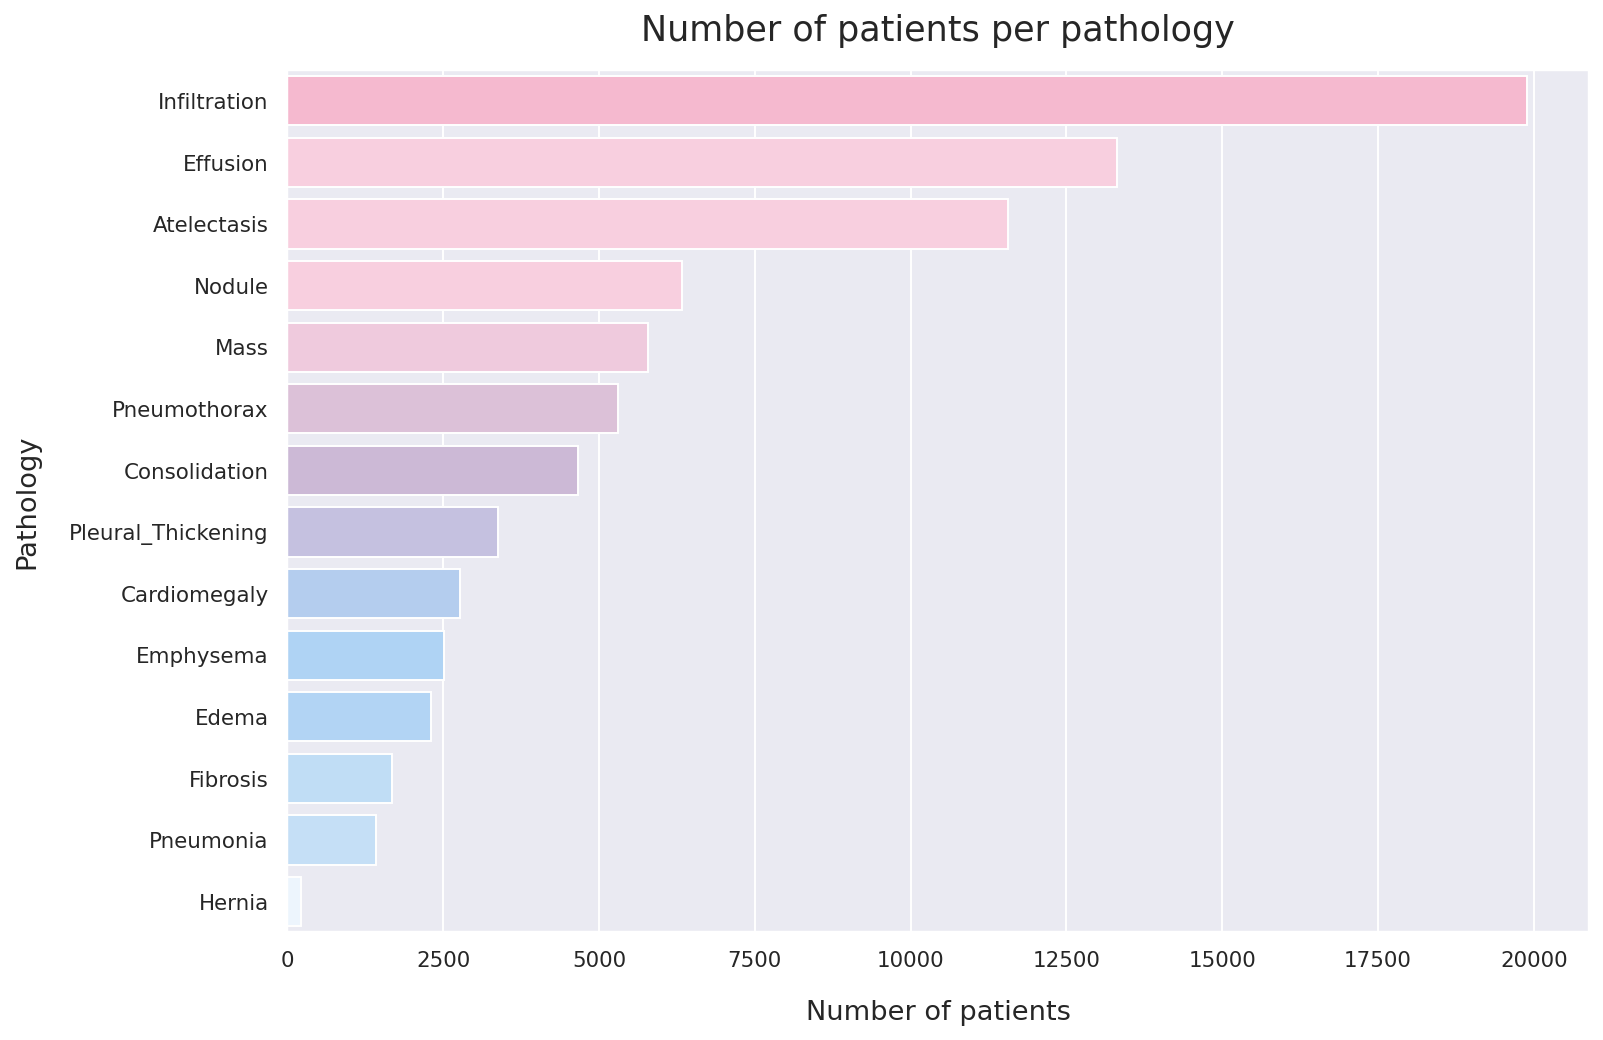

In [7]:
custom_colors = ["#FFAFCC", "#FFAFCC", "#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD", "#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD", "#CDB4DB","#CDB4DB", "#A2D2FF", "#BDE0FE","#EBF5FF"]

# Assuming df and labels are already defined
# Calculate label counts
label_counts = df[labels].sum().sort_values(ascending=False)

# Define custom colors and create a colormap
custom_colors = custom_colors[::-1]  # Reverse the color order
cmap = LinearSegmentedColormap.from_list('custom_cmap', custom_colors, N=256)

# Normalize the label_counts values to range between 0 and 1 for color mapping
norm = plt.Normalize(label_counts.values.min(), label_counts.values.max())
colors = cmap(norm(label_counts.values))

# Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=label_counts.values, y=label_counts.index, palette=colors)
plt.xlabel('Number of patients')
plt.ylabel('Pathology')
plt.title('Number of patients per pathology')
plt.savefig('no-patients-per-disease.png')

In [10]:
label_counts = df[labels].sum().sort_values(ascending=False)

# Calculate total number of samples
total_samples = len(df)

# Calculate percentage of occurrences for each disease
percentage_occurrences = (label_counts / total_samples) * 100

# Create a dataframe from label_counts and percentage_occurrences
label_counts_df = pd.DataFrame({
    'Number of Patients': label_counts,
    'Percentage of Total': percentage_occurrences
})

# Display the dataframe
print(label_counts_df)

                    Number of Patients  Percentage of Total
Infiltration                     19894            17.743489
Effusion                         13317            11.877453
Atelectasis                      11559            10.309490
Nodule                            6331             5.646629
Mass                              5782             5.156975
Pneumothorax                      5302             4.728862
Consolidation                     4667             4.162504
Pleural_Thickening                3385             3.019087
Cardiomegaly                      2776             2.475919
Emphysema                         2516             2.244024
Edema                             2303             2.054049
Fibrosis                          1686             1.503746
Pneumonia                         1431             1.276311
Hernia                             227             0.202462
